# Linerar Regression with Scikit-Learn 

A simple project based on simple linear_regression.

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data

This dataset displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [2]:
df=pd.read_csv('../Data/Advertising.csv')

In [3]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
df.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

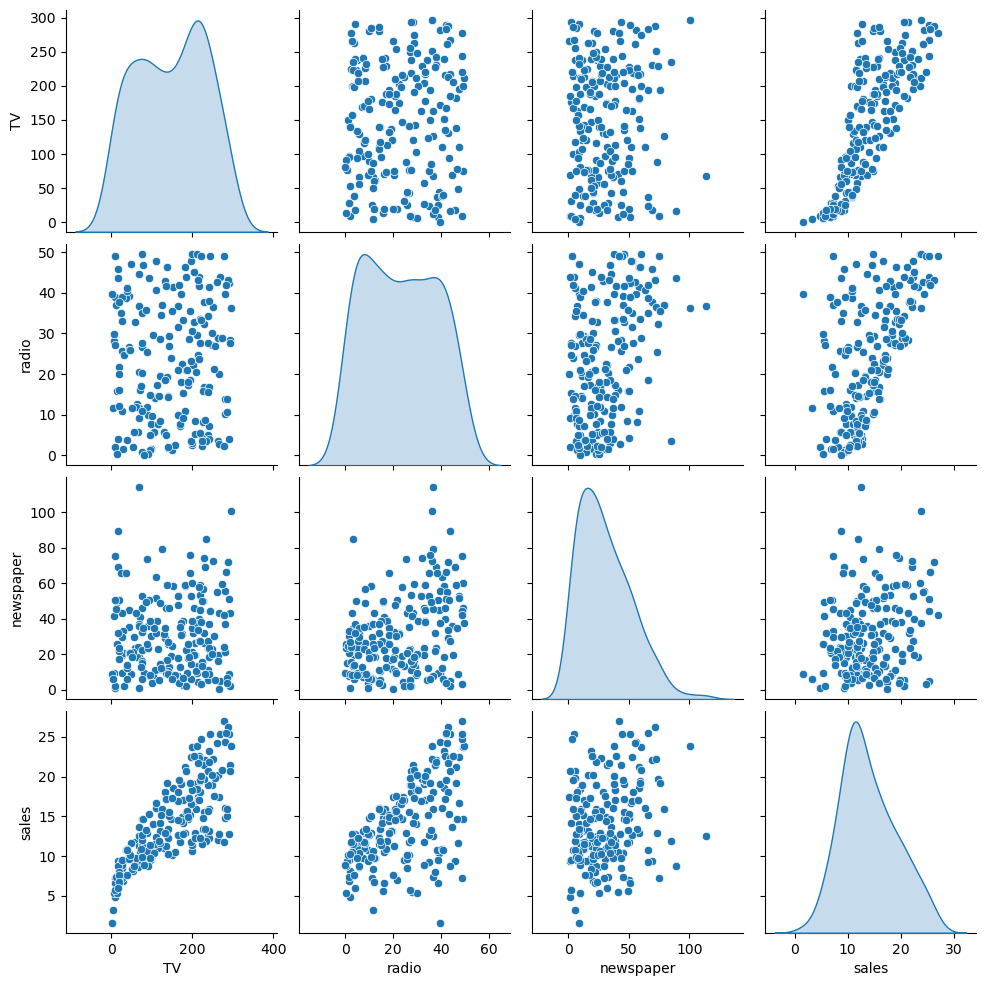

In [7]:
sns.pairplot(data=df,diag_kind='kde')

<Axes: xlabel='sales', ylabel='TV'>

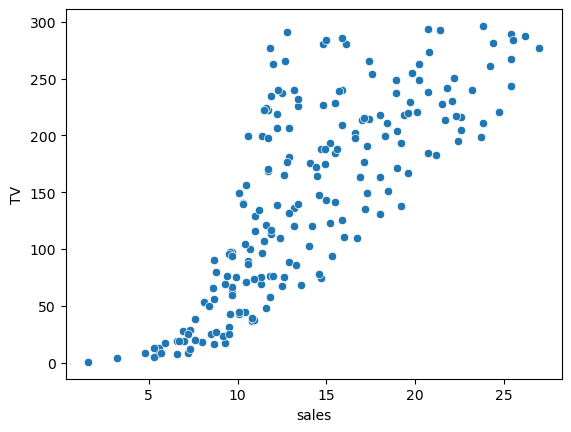

In [8]:
sns.scatterplot(data=df,x=df['sales'],y=df['TV'])

<Axes: xlabel='sales', ylabel='radio'>

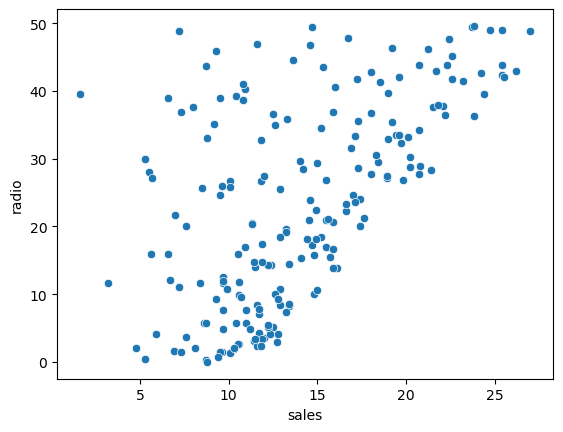

In [9]:
sns.scatterplot(data=df,x=df['sales'],y=df['radio'])

<Axes: xlabel='sales', ylabel='newspaper'>

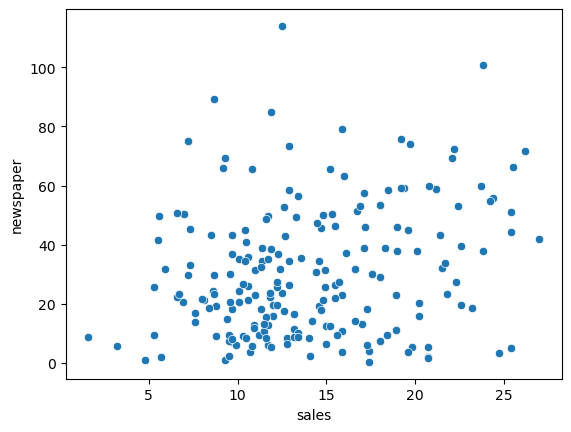

In [10]:
sns.scatterplot(data=df,x=df['sales'],y=df['newspaper'])

# Select dependent and independent features

In [11]:
X=df.drop('sales',axis=1)
y=df['sales']

# Train_Test_split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Model (Estimator)

import a model class from a model family

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [17]:
linear_model=LinearRegression()

Fit/Train the model on the training data

In [18]:
linear_model.fit(X_train,y_train)

LinearRegression()

# Calculate Performance on Test Set

In [19]:
y_pred=linear_model.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [21]:
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)

In [22]:
MAE

1.5116692224549084

In [23]:
MSE

3.796797236715217

In [24]:
RMSE

1.9485372043446378

In [25]:
data=[MAE,MSE,RMSE]
index=['MAE','MSE','RMSE']
columns=['ERROR']

In [26]:
error=pd.DataFrame(data,index,columns)

In [27]:
error

ERROR
MAE   1.511669
MSE   3.796797
RMSE  1.948537

# Final model fit

In [28]:
final_model=LinearRegression()

In [29]:
final_model.fit(X,y)

LinearRegression()

In [30]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [31]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
TV            0.045765
radio         0.188530
newspaper    -0.001037

# Prediction on new Data

In [32]:
campaign = [[149,22,12]]

In [33]:
final_model.predict(campaign)

C:\Users\MANISH SAINI\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

# Saving and Loading Model

In [34]:
from joblib import dump, load

In [35]:
dump(final_model,'sales_model.joblib')

['sales_model.joblib']

In [36]:
loaded_model=load('sales_model.joblib')

In [37]:
loaded_model.predict(campaign)

C:\Users\MANISH SAINI\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

# The End